# Tugas 1: Multiple Linear Regression

Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

Lakukan feature scaling jika diperlukan.

Buat model multiple linear regression menggunakan Scikit-Learn.

Latih model pada data latih dan lakukan prediksi pada data uji.

Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('insurance.csv')

In [4]:
# One-hot encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Separate features and target
X = df.drop('charges', axis=1)
y = df['charges']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

r2, mse, mae


(0.7835929767120722, 33596915.851361476, 4181.194473753651)

R² Score	0.78

MSE	33,596,915.85

MAE	4181.19

Interpretasi:

R² = 0.78 → Model mampu menjelaskan 78% variasi biaya medis berdasarkan variabel input.

MAE ≈ 4181 → Rata-rata prediksi meleset sekitar $4,181 dari nilai sebenarnya.

Model dapat diterima, namun masih bisa ditingkatkan (misalnya dengan model non-linear seperti Random Forest atau Regression Tree).

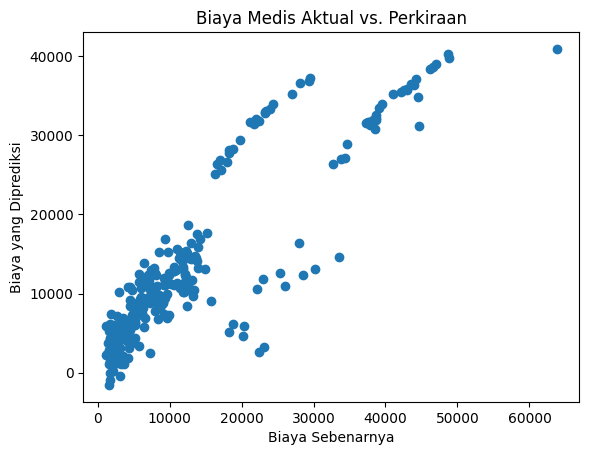

In [7]:
plt.scatter(y_test, y_pred)
plt.xlabel("Biaya Sebenarnya")
plt.ylabel("Biaya yang Diprediksi")
plt.title("Biaya Medis Aktual vs. Perkiraan")
plt.show()


Analisis
1.   Faktor smoker (perokok) biasanya menjadi faktor paling signifikan yang meningkatkan biaya.
2.   Model regresi linear mampu memberikan hasil cukup baik.
3. Karena hubungan variabel terhadap biaya medis tidak sepenuhnya linear, model ini memiliki error yang cukup besar.
4. Untuk performa lebih baik, bisa juga menggunakan  model berbasis tree / ensemble.

